### Sketching

we want somewhere programmy where we can sketch ideas - I actually think notebooks come close to being something much more inportant but I might go on about that later...

In [1]:
import math
import matplotlib.pyplot as plt

there must be better things for drawing than pyplot but for the moment that's what I'll use

here's some very basic clock stuff:

In [24]:
circle = math.pi * 2
minute = circle / 60
# we have 60 seconds and 60 minutes
second = minute
hour = circle / 12

start = math.pi / 2

def point(rad, ratio):
    return math.cos(start - rad*ratio), math.sin(start - rad*ratio)

In [26]:
math.sin(start - 6 * circle / 12)

-1.0

## Unit circle

the unit circle is useful - here's something the gitbook kinda misses out on imo: we know a lot about unit circles and we can use things we know about them to test things in our implementation that *aren't used* in that implementation.

Why does that matter? I think there's a habit in a lot of testing to place the same logic in the test as is in the thing being tested - so if you get it wrong, it's wrong. The downside of course is if you get the thinking wrong in the test then you can waste a lot of time going back and forward (but hey that's testing...)

In [3]:
fourtyFiveDegrees = math.cos(start - math.pi/4), math.sin(start - math.pi/4)
sixtyDegrees = math.cos(start - math.pi/3), math.sin(start - math.pi/3)

fourtyFiveDegrees, sixtyDegrees

((0.7071067811865476, 0.7071067811865476), (0.8660254037844386, 0.5))

## Precision

We know stuff about clocks too

our unit circle has centre 0, 0

at 3 o'clock wwe expect hour hand's tip to be at x,y poiot 1, 0 

the minute hand will get here in 15 minutes

at 6 the hour hand should point straight down, the same for 30 minutes

In [7]:
point(3, hour), point(15, minute), point(6, hour), point(30, minute)

((1.0, 0.0),
 (1.0, 0.0),
 (6.123233995736766e-17, -1.0),
 (6.123233995736766e-17, -1.0))

all good but our precision starts messing up, we'll need to account for this in our tests

### In between

Do our hands 'tick' or move smoothly?
* the hour hand we'll definitely want to move as the minute hand moves
* but I think the minute hand should 'tick' from 1 to 2, 2 to 3 and not mark subdivisions

we could have a flag passed in but instead I'm going to fix this for now

so at 6:30 we'd expect the hour hand to be half way between 6 and 7

In [19]:
time = {'hour': 6, 'minute': 30}

hour_hand = time['hour'] + time['minute']/60

hour_hand, point(hour_hand, hour), point(7, hour)

(6.5,
 (-0.2588190451025204, -0.9659258262890684),
 (-0.4999999999999998, -0.8660254037844387))

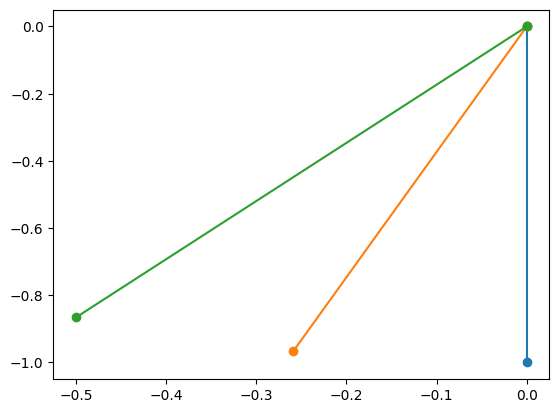

In [21]:
x1, y1 = [0, 0], [0, -1]
x2, y2 = [0, -0.2588190451025204], [0, -0.9659258262890684]
x3, y3 = [0, -0.4999999999999998], [0, -0.8660254037844387]
plt.plot(x1, y1, x2, y2, x3, y3, marker = 'o')
plt.show()

## Different length
hands

we'll want to have display the hands at different lengths.

not a problem we'll just scale the vector

we can check this doesn't mess things up by using slope

In [9]:
def slope(pt):
    return pt[1] / pt[0]

slope(point(7.5, minute))

1.0

so if we scale the hour hand to .8 of the unit circle we can verify the slope stays the same:

In [14]:
hour_length = 0.8

halfOne = point(1.5, hour)

halfOnePt = halfOne[0] * hour_length, halfOne[1] * hour_length

slope(halfOnePt), slope(halfOnePt) == slope(halfOne)

(1.0, True)

other stuff we might use:

well we know about rotations, just note it down here, but I think it's time to get to the [prompt](readme.md)

In [15]:
def rotate(pt, rad):
    x, y = pt
    xr = x * math.cos(rad) - (y * math.sin(rad))
    yr  = y * math.cos(rad) + (x * math.sin(rad))
    return (xr, yr) 

rotate((1,0), math.pi)

(-1.0, 1.2246467991473532e-16)